In [12]:
%pwd

'D:\\mini project'

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
%cd "D:\mini project"

D:\mini project


Already Exist
{'COVID': 8, 'Lung_Opacity': 6012, 'Normal': 5492, 'Viral Pneumonia': 45}


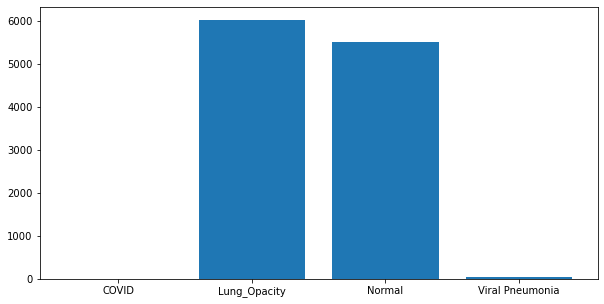

In [14]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

ROOT_DIR = "kaggle dataset/COVID-19_Radiography_Dataset/"
imgs = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

NEW_DIR = "all_images/"

if not os.path.exists(NEW_DIR):
    os.mkdir(NEW_DIR)

    for i in imgs:
        org_dir = os.path.join(ROOT_DIR, i + "/")

        for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
            shutil.copy(imgfile, NEW_DIR)

else:
    print("Already Exist")

counter = {'COVID': 0, 'Lung_Opacity': 0, 'Normal': 0, 'Viral Pneumonia': 0}

for image in imgs:
    for count in glob.iglob(NEW_DIR + image + "*"):
        counter[image] += 1

print(counter)

plt.figure(figsize=(10, 5))
plt.bar(x=counter.keys(), height=counter.values())
plt.show()

# Creating the folder

if not os.path.exists(NEW_DIR + "train_test_split/"):

    os.makedirs(NEW_DIR + "train_test_split/")

    os.makedirs(NEW_DIR + "train_test_split/train/Normal")
    os.makedirs(NEW_DIR + "train_test_split/train/Covid")

    os.makedirs(NEW_DIR + "train_test_split/test/Normal")
    os.makedirs(NEW_DIR + "train_test_split/test/Covid")

    os.makedirs(NEW_DIR + "train_test_split/validation/Normal")
    os.makedirs(NEW_DIR + "train_test_split/validation/Covid")

    # Train Data
    for i in np.random.choice(replace=False, size=3000, a=glob.glob(NEW_DIR + imgs[0] + "*")):
        shutil.copy(i, NEW_DIR + "train_test_split/train/Covid")
        os.remove(i)

    for i in np.random.choice(replace=False, size=3900, a=glob.glob(NEW_DIR + imgs[2] + "*")):
        shutil.copy(i, NEW_DIR + "train_test_split/train/Normal")
        os.remove(i)

    for i in np.random.choice(replace=False, size=900, a=glob.glob(NEW_DIR + imgs[3] + "*")):
        shutil.copy(i, NEW_DIR + "train_test_split/train/Covid")
        os.remove(i)

    # Validation Data
    for i in np.random.choice(replace=False, size=308, a=glob.glob(NEW_DIR + imgs[0] + "*")):
        shutil.copy(i, NEW_DIR + "train_test_split/validation/Covid")
        os.remove(i)

    for i in np.random.choice(replace=False, size=500, a=glob.glob(NEW_DIR + imgs[2] + "*")):
        shutil.copy(i, NEW_DIR + "train_test_split/validation/Normal")
        os.remove(i)

    for i in np.random.choice(replace=False, size=200, a=glob.glob(NEW_DIR + imgs[3] + "*")):
        shutil.copy(i, NEW_DIR + "train_test_split/validation/Covid")
        os.remove(i)

    # Test Data
    for i in np.random.choice(replace=False, size=300, a=glob.glob(NEW_DIR + imgs[0] + "*")):
        shutil.copy(i, NEW_DIR + "train_test_split/test/Covid")
        os.remove(i)

    for i in np.random.choice(replace=False, size=300, a=glob.glob(NEW_DIR + imgs[2] + "*")):
        shutil.copy(i, NEW_DIR + "train_test_split/test/Normal")
        os.remove(i)

    for i in np.random.choice(replace=False, size=200, a=glob.glob(NEW_DIR + imgs[3] + "*")):
        shutil.copy(i, NEW_DIR + "train_test_split/test/Covid")
        os.remove(i)

train_path = "all_images/train_test_split/train"
valid_path = "all_images/train_test_split/validation"
test_path = "all_images/train_test_split/test"

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
train_path  = "all_images/train_test_split/train"
valid_path  = "all_images/train_test_split/validation"
test_path   = "all_images/train_test_split/test"


In [17]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

In [18]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [19]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path, 
                                                target_size=(224,224))

Found 1008 images belonging to 2 classes.


In [20]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 800 images belonging to 2 classes.


In [21]:
class_type = {0:'Covid',  1 : 'Normal'}

In [22]:

t_img , label = train.next()

In [23]:
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


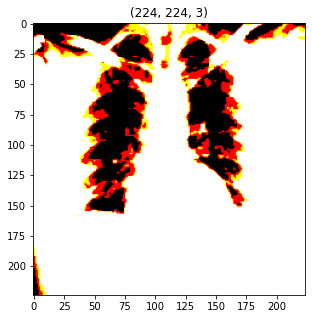

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


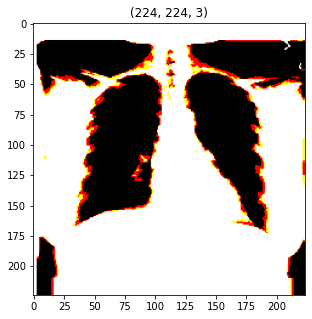

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


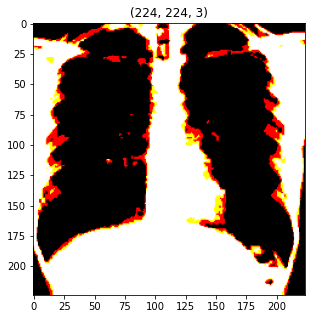

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


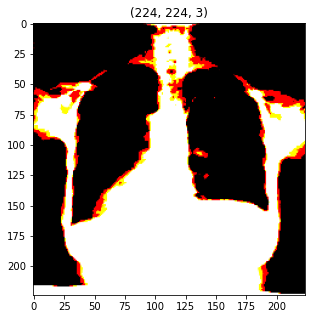

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


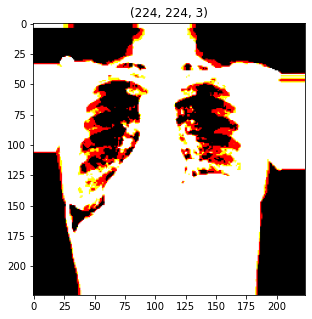

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


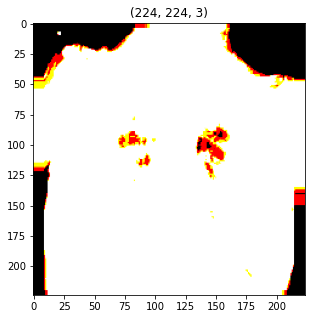

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


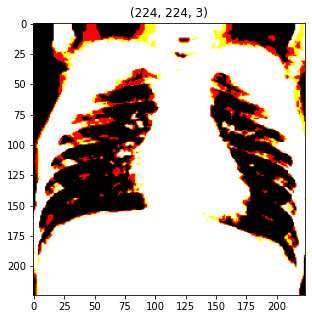

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


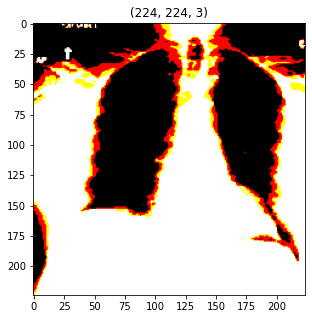

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


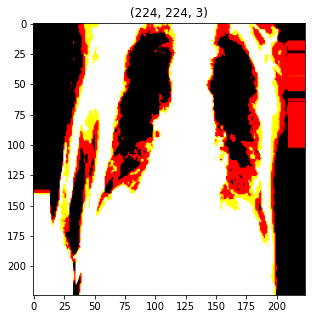

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


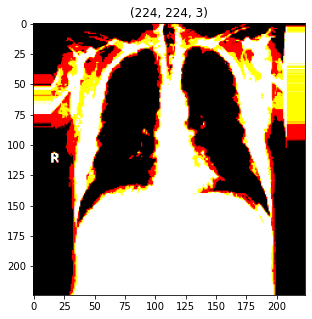

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


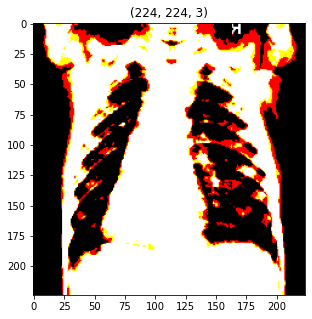

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


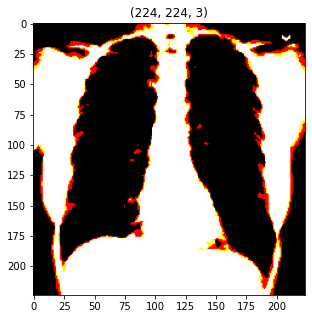

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


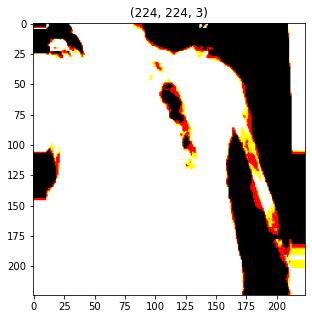

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


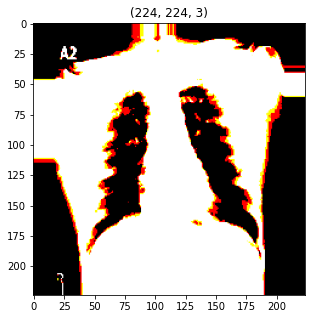

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


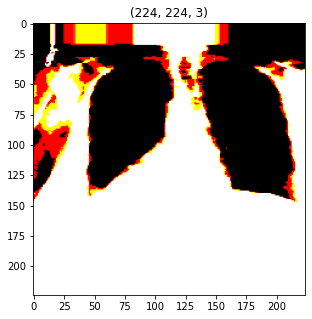

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


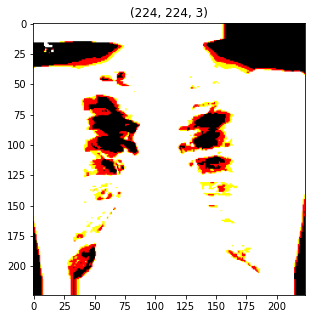

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


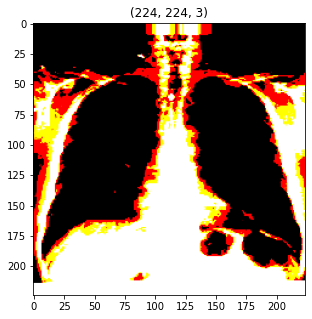

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


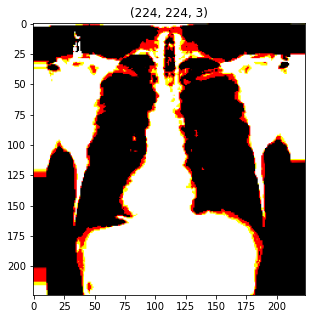

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


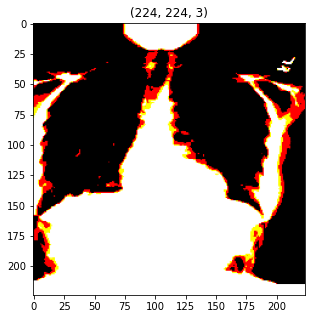

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


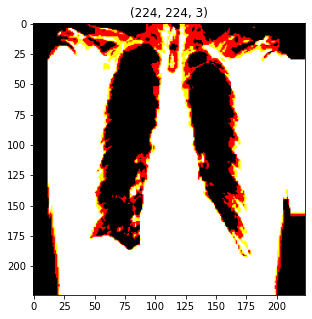

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


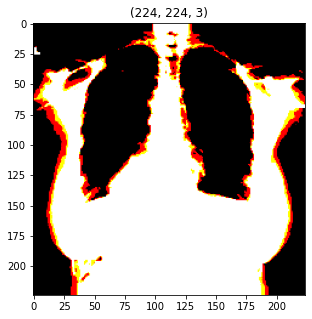

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


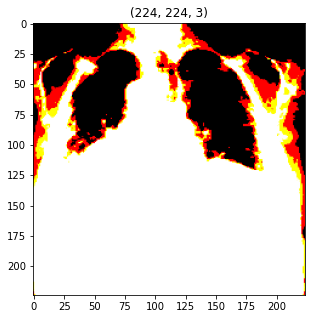

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


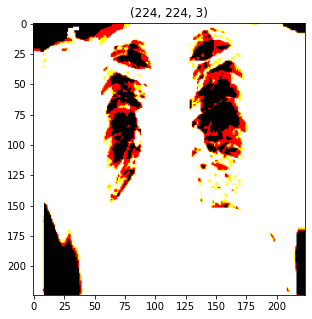

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


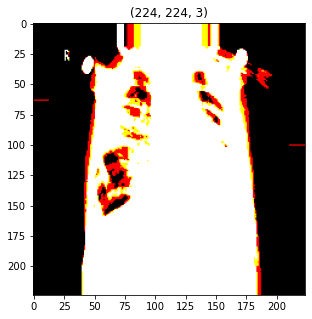

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


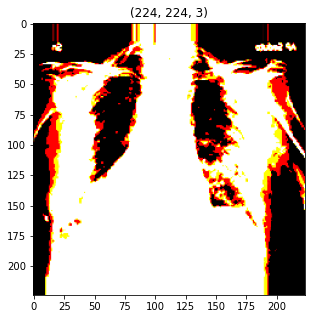

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


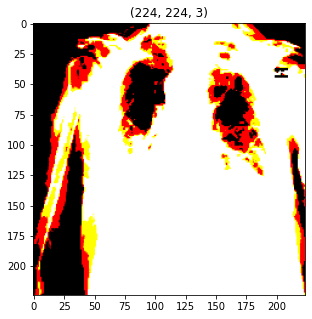

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


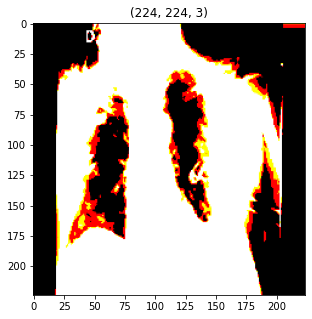

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


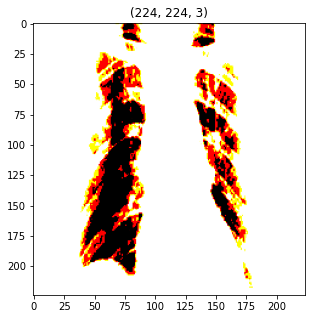

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


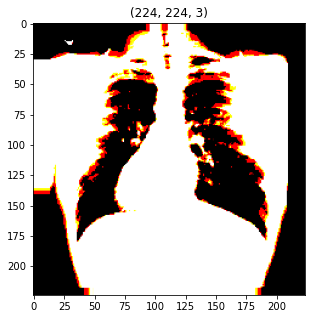

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


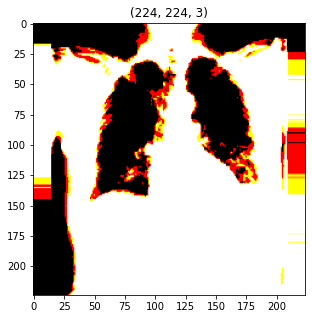

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


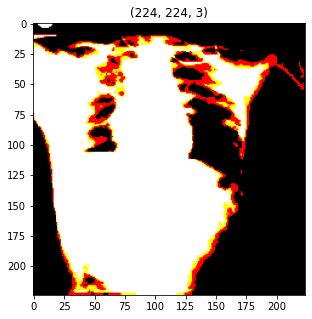

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


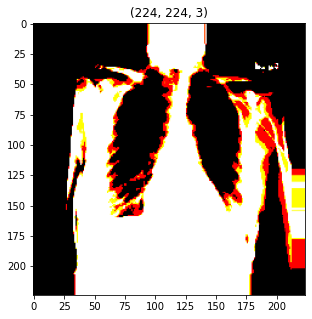

In [24]:
plotImages(t_img, label)

In [25]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D
from keras.models import Model

In [26]:
res = ResNet50(input_shape=(224,224,3), include_top= False, weights='imagenet')

In [27]:
for layer in res.layers:          
    layer.trainable = False

In [28]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)
model= Model(res.input, x)

In [30]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [31]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [26]:
hist = model.fit_generator(train, steps_per_epoch= 25, epochs=50 , validation_data= valid , validation_steps= 16, callbacks=[es,mc])

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 1.8722 - accuracy: 0.9100
Epoch 1: val_accuracy did not improve from 0.91016
25/25 [==============================] - 43s 2s/step - loss: 1.8722 - accuracy: 0.9100 - val_loss: 2.9634 - val_accuracy: 0.8770
Epoch 2/50
25/25 [==============================] - ETA: 0s - loss: 1.8563 - accuracy: 0.9025
Epoch 2: val_accuracy did not improve from 0.91016
25/25 [==============================] - 43s 2s/step - loss: 1.8563 - accuracy: 0.9025 - val_loss: 1.3687 - val_accuracy: 0.9023
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 1.2249 - accuracy: 0.9268
Epoch 3: val_accuracy improved from 0.91016 to 0.91797, saving model to bestmodel.h5
25/25 [==============================] - 43s 2s/step - loss: 1.2249 - accuracy: 0.9268 - val_loss: 1.4577 - val_accuracy: 0.9180
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 1.3406 - accuracy: 0.9217
Epoch 4: val_accuracy improved from 0.91797 to 0.9

In [32]:
from keras.models import load_model
model = load_model("bestmodel.h5")

In [33]:
h = hist.history
h.keys()

NameError: name 'hist' is not defined

In [1]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

NameError: name 'plt' is not defined

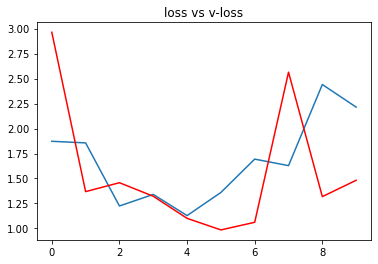

In [35]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")


plt.title("loss vs v-loss")
plt.show()

In [34]:
import tensorflow as tf
model= tf.keras.models.load_model('bestmodel.h5') # Loading the Tensorflow Saved Model
class_type = {0:'Covid',  1 : 'Normal'}

In [35]:
# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc*100} %")

The accuracy of your model is = 93.25000047683716 %


In [3]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

In [4]:
# path for that new image. ( you can take it either from google or any other scource)

path = "sample2.png"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sample2.png'

The given X-Ray image is of type = Covid

The chances of image being Covid is : 58.4151566028595 percent

The chances of image being Normal is : 35.56485176086426 percent


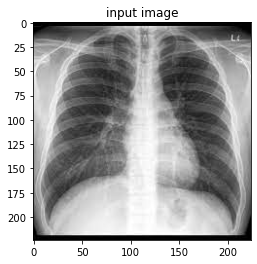

In [38]:
# path for that new image. ( you can take it either from google or any other scource)

path = "download.jpg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

The given X-Ray image is of type = Normal

The chances of image being Covid is : 5.05000024020319e-06 percent

The chances of image being Normal is : 99.99790787696838 percent


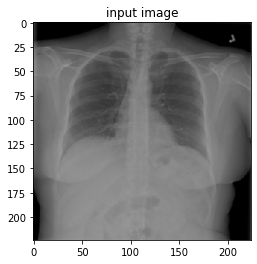

In [40]:
# path for that new image. ( you can take it either from google or any other scource)

path = "Normal-5254.png"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

In [41]:
import tensorflow as tf

In [42]:
# this function is udes to generate the heat map of aan image
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [43]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [44]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded 
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [45]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "conv5_block3_3_conv", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """
  
  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()
  print()
  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing region on interest")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()